Two-body approximation

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
R_earth = 6371302 # in m
mu_earth = 398600.4415e+9
omega_earth = 7.29211e-5
J2=1082.8e-6
p={'mu': mu_earth, 'i': 98 / 180 * np.pi, 'J2':J2}

широта (lat) - угол между r и xOy и по  z  определяем знак
долгота (long) - угол между r и xOz  по z определяем 360-fi

In [3]:
def angle_between(v1,v2):
    return np.arccos(np.clip(np.dot(v1 / np.linalg.norm(v1), v2 / np.linalg.norm(v2)), -1.0, 1.0))

def getProjection(y):
    #print(y)
    lat = (np.pi / 2 - angle_between(y[:3], np.array([0,0,1])))
    long = angle_between(y[:2], np.array([1,0]))*(np.sign(y[1]) if y[1]!=0 else 1)
    return np.append(lat,long)

In [4]:
angle_between(np.array([0,0,1]), np.array([0,1,0]))*180/np.pi

np.float64(90.0)

In [5]:
# [x y z vx vy vz] -> [lat, long]

print(getProjection(np.array([0,1,0,0,0,0]))*180/np.pi)
print(getProjection(np.array([0,0,1,0,0,0]))*180/np.pi)
print(getProjection(np.array([0,1,1,0,0,0]))*180/np.pi)
print(getProjection(np.array([1,1,0,0,0,0]))*180/np.pi)
print(getProjection(np.array([-0.4,0,0,0,1,0]))*180/np.pi)


[ 0. 90.]
[90. nan]
[45. 90.]
[ 0. 45.]
[  0. 180.]


C:\Users\Daniil\AppData\Local\Temp\ipykernel_13432\1109198627.py:2: RuntimeWarning: invalid value encountered in divide
  return np.arccos(np.clip(np.dot(v1 / np.linalg.norm(v1), v2 / np.linalg.norm(v2)), -1.0, 1.0))


In [6]:
# y is considered horizontal matrix
def dydt(t,y_curr: np.array, p):
    # gravity center is at (0,0,0)
    # a = mu / r**2
    r = y_curr[:3]
    g = -p['mu'] / np.sqrt(np.sum(r**2)) ** 3 * r
    #print(y_curr[:3], a)
    p2=(1-3*np.cos(getProjection(r)[1])**2)/2
    g_corr=3*p['mu']*p['J2']/(np.sqrt(np.sum(r**2))**4)*p2
    g=g+g_corr*r/ np.sqrt(np.sum(r**2))
    return np.append(y_curr[3:], g)

In [7]:
def ev(t, y):
    return y[2]

ev.tremial=0
ev.direction=0

In [8]:

Rot_x = np.array([[1,0,0],
                      [0, np.cos(p['i']), -np.sin(p['i'])],
                      [0, np.sin(p['i']), np.cos(p['i'])]])

In [9]:
hgsts=[]
for dh in range(400,610,10):
    print(dh)
    R_orb=dh+R_earth
    y_0 = np.array([R_orb, 0, 0, 0, (mu_earth / R_orb)**0.5, 0])
    y_rot = np.append(y_0[:3], np.transpose(Rot_x @ np.transpose(y_0[3:])))
    sol=solve_ivp(lambda t,y: dydt(t,y,p), [0,T],y_rot, method="RK45", events=ev, rtol=1e-6)
    crd=np.array(list(map(getProjection,(sol.y_events)[0]))).transpose()
    crd[1]-=sol.t_events[0]*omega_earth
    for i in range(crd[1].shape[0]):
        while (crd[1][i]<-np.pi):
            crd[1][i]+=2*np.pi
    scrd=np.array(sorted(crd[1]))
    hgsts.append(np.min(scrd[1:]-scrd[:-1]))
plt.plot(range(400,610,10),hgsts)

400


NameError: name 'T' is not defined

In [10]:
dal=200e3/R_earth

In [11]:
R_orb=400e3+R_earth
y_0 = np.array([R_orb, 0, 0, 0, (mu_earth / R_orb)**0.5, 0])

T= 120*3600
Tp=R_orb * 2 * np.pi *16/ ((mu_earth / R_orb)**0.5)

y_rot = np.append(y_0[:3], np.transpose(Rot_x @ np.transpose(y_0[3:])))
sol=solve_ivp(lambda t,y: dydt(t,y,p), [0,T],y_rot, method="RK45",t_eval=np.arange(0,T,60), events=ev, rtol=1e-6)

In [12]:
T/Tp

4.869053066862675

In [13]:
y_rot

array([ 6.77130200e+06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.06779553e+03,  7.59776001e+03])

In [14]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [     0     60 ... 431880 431940]
        y: [[ 6.771e+06  6.756e+06 ...  5.278e+06  5.554e+06]
            [ 0.000e+00 -6.402e+04 ...  5.901e+05  5.388e+05]
            ...
            [-1.068e+03 -1.065e+03 ... -8.325e+02 -8.761e+02]
            [ 7.598e+03  7.580e+03 ...  5.924e+03  6.234e+03]]
      sol: None
 t_events: [array([ 0.000e+00,  2.773e+03, ...,  4.269e+05,  4.297e+05])]
 y_events: [array([[ 6.771e+06,  0.000e+00, ..., -1.068e+03,  7.598e+03],
                  [-6.771e+06,  8.004e-11, ...,  1.068e+03, -7.598e+03],
                  ...,
                  [ 6.770e+06, -2.788e-08, ..., -1.068e+03,  7.598e+03],
                  [-6.770e+06, -2.823e-09, ...,  1.068e+03, -7.598e+03]])]
     nfev: 15428
     njev: 0
      nlu: 0

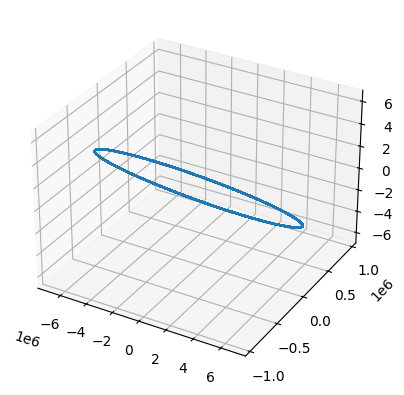

In [15]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot(sol.y[0],sol.y[1],sol.y[2])

In [16]:
np.transpose(sol.y)

array([[ 6.77130200e+06,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.06779553e+03,  7.59776001e+03],
       [ 6.75565976e+06, -6.40183994e+04,  4.55514581e+05,
        -5.21207141e+02, -1.06532884e+03,  7.58020854e+03],
       [ 6.70880532e+06, -1.27741007e+05,  9.08924492e+05,
        -1.04000568e+03, -1.05794017e+03,  7.52763546e+03],
       ...,
       [ 4.97803236e+06,  6.38618949e+05, -4.54400993e+06,
         5.20050005e+03, -7.85186287e+02,  5.58689073e+03],
       [ 5.27831639e+06,  5.90068314e+05, -4.19855422e+06,
         4.80513834e+03, -8.32549953e+02,  5.92390073e+03],
       [ 5.55420368e+06,  5.38790120e+05, -3.83369091e+06,
         4.38756364e+03, -8.76065530e+02,  6.23353015e+03]])

np.float64(336.8317552461121)

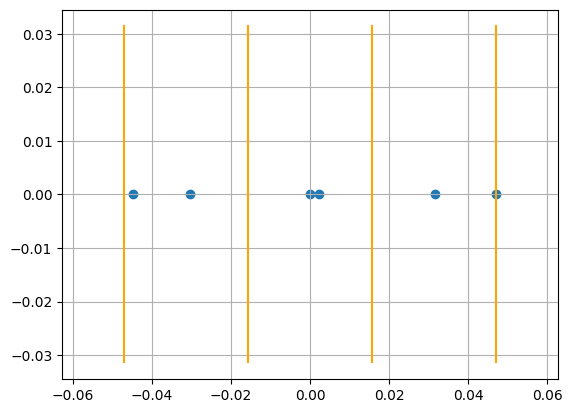

In [17]:
crd=np.array(list(map(getProjection,(sol.y_events)[0]))).transpose()[1]
crd=np.append(crd,crd+dal*1.5)
crd-=np.append(sol.t_events[0]*omega_earth,sol.t_events[0]*omega_earth)
for i in range(crd.shape[0]):
    while (crd[i]<-np.pi):
        crd[i]+=2*np.pi
#wh=np.where(np.abs(crd[0])<dal)[0]
plt.scatter(crd,[0]*crd.shape[0])
plt.plot([-dal/2,-dal/2],[-dal,dal], c='orange')
plt.plot([dal/2,dal/2],[-dal,dal], c='orange')
plt.plot([-3*dal/2,-3*dal/2],[-dal,dal], c='orange')
plt.plot([3*dal/2,3*dal/2],[-dal,dal], c='orange')
plt.xlim(-2*dal, 2*dal)
plt.grid()
np.max(crd[1])*360/np.pi


In [18]:
scrd=np.array(sorted(crd))
print(dal)
print(np.min(scrd[1:]-scrd[:-1]))
print(np.max(scrd[1:]-scrd[:-1]))

0.031390758121338465
0.002222135723840779
0.0328057999161242


In [19]:
Rot_z = np.array([[np.cos(dal*1.5),-np.sin(dal*1.5),0],
                      [np.sin(dal*1.5),  np.cos(dal*1.5), 0],
                      [0, 0,1]])

In [20]:
y_rot2=np.append(np.transpose(Rot_z @ np.transpose(y_rot[0:3])), np.transpose(Rot_z @ np.transpose(y_rot[3:])))
sol2=solve_ivp(lambda t,y: dydt(t,y,p), [0,T],y_rot2, method="RK45",t_eval=np.arange(0,T,60), events=ev, rtol=1e-6)

In [21]:
y_rot2

array([ 6.76379705e+06,  3.18716653e+05,  0.00000000e+00,  5.02597903e+01,
       -1.06661204e+03,  7.59776001e+03])

np.float64(336.8317552461121)

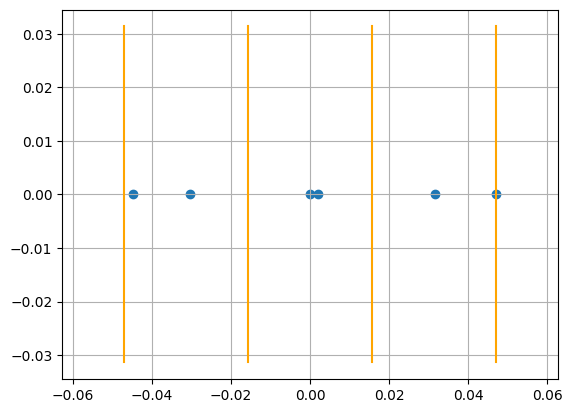

In [22]:
crd=np.array(list(map(getProjection,(sol.y_events)[0]))).transpose()[1]
crd=np.append(crd,np.array(list(map(getProjection,(sol2.y_events)[0]))).transpose()[1])
crd-=np.append(sol.t_events[0]*omega_earth,sol2.t_events[0]*omega_earth)
for i in range(crd.shape[0]):
    while (crd[i]<-np.pi):
        crd[i]+=2*np.pi
#wh=np.where(np.abs(crd[0])<dal)[0]
plt.scatter(crd,[0]*crd.shape[0])
plt.plot([-dal/2,-dal/2],[-dal,dal], c='orange')
plt.plot([dal/2,dal/2],[-dal,dal], c='orange')
plt.plot([-3*dal/2,-3*dal/2],[-dal,dal], c='orange')
plt.plot([3*dal/2,3*dal/2],[-dal,dal], c='orange')
plt.xlim(-2*dal, 2*dal)
plt.grid()
np.max(crd[1])*360/np.pi

Каждый виток долгота меняется на ~ -0.4123 рад

In [23]:
scrd=np.array(sorted(crd))
print(dal)
print(np.min(scrd[1:]-scrd[:-1]))
print(np.max(scrd[1:]-scrd[:-1]))

0.031390758121338465
0.0018743919781840646
0.0328057999161242


In [24]:
sol.t.reshape(sol.t.shape[0],1),sol.y.transpose()

(array([[     0],
        [    60],
        [   120],
        ...,
        [431820],
        [431880],
        [431940]]),
 array([[ 6.77130200e+06,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.06779553e+03,  7.59776001e+03],
        [ 6.75565976e+06, -6.40183994e+04,  4.55514581e+05,
         -5.21207141e+02, -1.06532884e+03,  7.58020854e+03],
        [ 6.70880532e+06, -1.27741007e+05,  9.08924492e+05,
         -1.04000568e+03, -1.05794017e+03,  7.52763546e+03],
        ...,
        [ 4.97803236e+06,  6.38618949e+05, -4.54400993e+06,
          5.20050005e+03, -7.85186287e+02,  5.58689073e+03],
        [ 5.27831639e+06,  5.90068314e+05, -4.19855422e+06,
          4.80513834e+03, -8.32549953e+02,  5.92390073e+03],
        [ 5.55420368e+06,  5.38790120e+05, -3.83369091e+06,
          4.38756364e+03, -8.76065530e+02,  6.23353015e+03]]))

In [25]:
one=np.append(sol.t.reshape(sol.t.shape[0],1),sol.y.transpose(), axis=1)
two=np.append(one,sol2.y.transpose(), axis=1)

In [26]:
np.savetxt("coords.csv", two, delimiter=",")

In [73]:
crd=np.array(list(map(getProjection,sol.y.transpose()))).transpose()*180/np.pi
crd2=np.array(list(map(getProjection,sol2.y.transpose()))).transpose()*180/np.pi
crd[1]-=sol.t*omega_earth
crd2[1]-=sol2.t*omega_earth
#wh=np.where(np.abs(crd[0])<dal)[0]

In [74]:
import numba


def fn(crd):
    for i in range(crd[1].shape[0]):
        while (crd[1][i]<-np.pi):
            crd[1][i]+=2*np.pi
    return crd

In [75]:
crd=fn(crd)

In [76]:
crd2=fn(crd2)

In [77]:
crd2

array([[  0.        ,   3.85727721,   7.71420508, ..., -42.769159  ,
        -38.9398119 , -35.10356587],
       [  2.69783693,   2.15052811,   1.5982608 , ...,  -2.47170076,
          2.85818945,   2.00235273]])

In [78]:
#for i in range(crd2[1].shape[0]):
#    while (crd2[1][i]<-np.pi):
#        crd2[1][i]+=2*np.pi

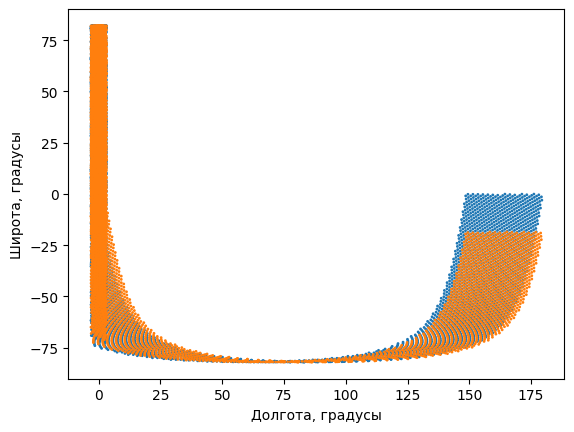

In [79]:
plt.scatter(crd[1],crd[0], [1]*crd.shape[1])
plt.scatter(crd2[1],crd2[0], [1]*crd2.shape[1])
plt.xlabel("Долгота, градусы")
plt.ylabel("Широта, градусы")
#plt.xlim([-180,180])
#plt.xlim([-90,90])
plt.savefig("all_traj.png")
#plt.ylim([-20,20])
#plt.xlim([0,30])
plt.savefig("in_place.png")